## How to do it...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# Set dataset and model parameters
batch_size = 128
buffer_size = 128
epochs = 20

# Set transformation parameters
crop_height = 24
crop_width = 24

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [21]:


# Define CIFAR reader
def read_cifar_files(image, label):

    final_image = tf.image.resize_with_crop_or_pad(image, crop_width, crop_height)
    final_image = image / 255

    # Randomly flip the image horizontally, change the brightness and contrast
    final_image = tf.image.random_flip_left_right(final_image)
    final_image = tf.image.random_brightness(final_image,max_delta=0.1)
    final_image = tf.image.random_contrast(final_image,lower=0.5, upper=0.8)

    return final_image, label



In [22]:
dataset_train_processed = dataset_train.shuffle(buffer_size).batch(batch_size).map(read_cifar_files)
dataset_test_processed = dataset_test.batch(batch_size).map(read_cifar_files)

In [23]:
model = keras.Sequential(
    [# First Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(input_shape=[32, 32, 3],
                            filters=32,
                            kernel_size=3,
                            padding='SAME', 
                            activation='relu',
                            kernel_initializer='he_uniform',
                            name='C1'),
     tf.keras.layers.Conv2D(filters=32,
                            kernel_size=3,
                            padding='SAME',
                            activation='relu',
                            kernel_initializer='he_uniform',
                            name='C2'),
     tf.keras.layers.MaxPool2D((2,2),
                               name='P1'),
     tf.keras.layers.Dropout(0.2),
     # Second Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            padding='SAME',
                            activation='relu',
                            kernel_initializer='he_uniform',
                            name='C3'),
     tf.keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            padding='SAME',
                            activation='relu',
                            kernel_initializer = 'he_uniform',
                            name='C4'),
     tf.keras.layers.MaxPool2D((2,2),
                               name='P2'),
     tf.keras.layers.Dropout(0.2),
     # Third Conv-ReLU-Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(filters=128,
                            kernel_size=3,
                            padding="SAME",
                            activation='relu',
                            kernel_initializer='he_uniform',
                            name='C5'),
     tf.keras.layers.Conv2D(filters=128,
                            kernel_size=3,
                            padding='SAME',
                            activation='relu',
                            kernel_initializer='he_uniform',
                            name='C6'),
     tf.keras.layers.MaxPool2D((2,2),
                               name='P3'),
     tf.keras.layers.Dropout(0.2),
     # Flatten layer
     tf.keras.layers.Flatten(name='FLATTEN'),
     # Fully connected Layer
     tf.keras.layers.Dense(units=128,
                           activation='relu',
                           name='D1'),
     tf.keras.layers.Dropout(0.2),
     # Final Fully Connected Layer
     tf.keras.layers.Dense(units=10,
                           activation='softmax',
                           name='OUTPUT')
    ])

In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 32, 32, 32)        896       
_________________________________________________________________
C2 (Conv2D)                  (None, 32, 32, 32)        9248      
_________________________________________________________________
P1 (MaxPooling2D)            (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 16, 16, 64)        18496     
_________________________________________________________________
C4 (Conv2D)                  (None, 16, 16, 64)        36928     
_________________________________________________________________
P2 (MaxPooling2D)            (None, 8, 8, 64)         

In [25]:
history = model.fit(dataset_train_processed, validation_data=dataset_test_processed, epochs=epochs)

Epoch 1/20
391/391 [==============================] - 7s 10ms/step - loss: 1.9922 - accuracy: 0.2822 - val_loss: 1.6891 - val_accuracy: 0.3964
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5169 - accuracy: 0.4571 - val_loss: 1.4600 - val_accuracy: 0.4993
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 1.2831 - accuracy: 0.5489 - val_loss: 1.0940 - val_accuracy: 0.6158
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1096 - accuracy: 0.6113 - val_loss: 0.9156 - val_accuracy: 0.6778
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9860 - accuracy: 0.6552 - val_loss: 0.8442 - val_accuracy: 0.7060
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8988 - accuracy: 0.6877 - val_loss: 0.8345 - val_accuracy: 0.7114
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8290 - accuracy: 0.7120 - val_loss: 0.7720 - val_accuracy: 0.7354


In [29]:
# Print loss and accuracy
# Matplotlib code to plot the loss and accuracy
epochs_indices = range(0, 20, 1)

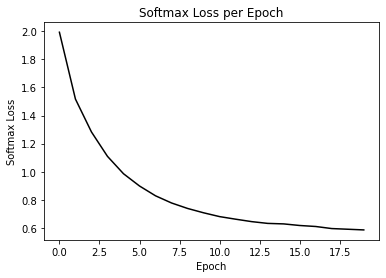

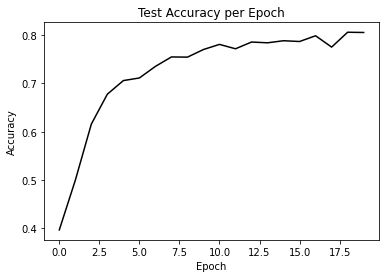

In [30]:
# Plot loss over time
plt.plot(epochs_indices, history.history['loss'], 'k-')
plt.title('Softmax Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(epochs_indices, history.history['val_accuracy'], 'k-')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()